# 1. Import libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import scipy.stats


# Encoding
from sklearn.preprocessing import LabelEncoder

# Scaling 
from sklearn.preprocessing import StandardScaler



# Machine learning model
from sklearn.ensemble import ExtraTreesClassifier


# Performence 
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

#dealing with imbalnce data 
from imblearn.over_sampling import SMOTE

#model selection 
from pycaret.classification import setup, compare_models


# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# 2. read data


In [2]:
data = pd.read_csv("xAPI-Edu-Data.csv")

In [3]:
data.head(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
data["Class"].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

# 3. Exploratory Data Analysis (EDA)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

### 3.1 Categorical Features

In [6]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

gender                       2
NationalITy                 14
PlaceofBirth                14
StageID                      3
GradeID                     10
SectionID                    3
Topic                       12
Semester                     2
Relation                     2
ParentAnsweringSurvey        2
ParentschoolSatisfaction     2
StudentAbsenceDays           2
Class                        3
dtype: int64

In [7]:
categorical_F = data.select_dtypes(object)

In [8]:
categorical_F.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

In [9]:
categorical_F.describe()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,270,292,289,211


#### 3.1.1 gender Features

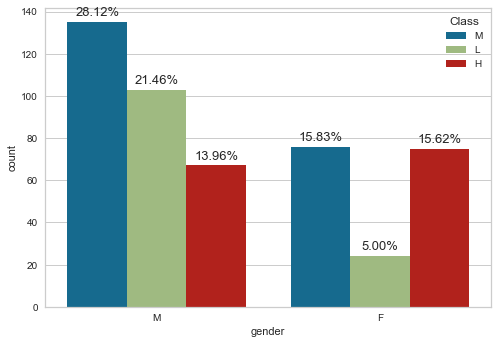

In [10]:
#plt.figure(figsize=(10,10))
s = sns.countplot(x=data["gender"], hue="Class", data=data)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data)*100),
            ha="center", fontsize=13)

<AxesSubplot:xlabel='count', ylabel='gender'>

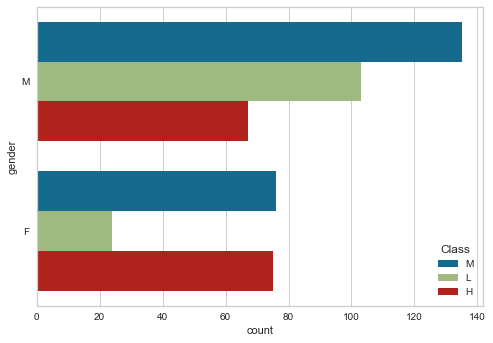

In [11]:
sns.countplot(y=categorical_F["gender"], hue="Class", data=data)

In [12]:
data.groupby(categorical_F["gender"])["Class"].value_counts()

gender  Class
F       M         76
        H         75
        L         24
M       M        135
        L        103
        H         67
Name: Class, dtype: int64

In [13]:
categorical_F["gender"].value_counts()

M    305
F    175
Name: gender, dtype: int64

#### 3.1.2 NationalITy Features

<AxesSubplot:xlabel='count', ylabel='NationalITy'>

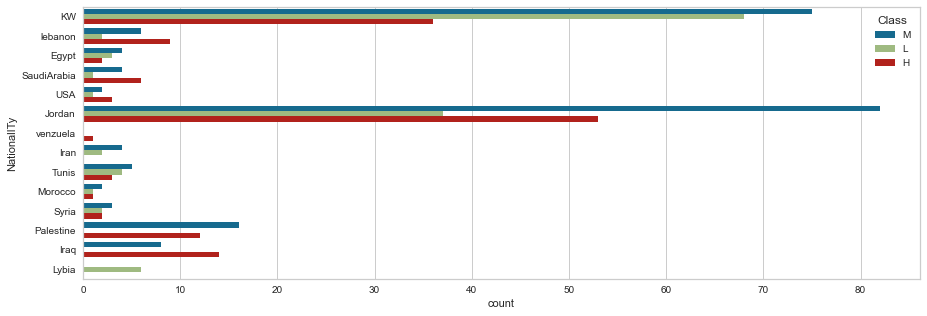

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(y=categorical_F["NationalITy"], hue="Class", data=data)

In [15]:
data.groupby(categorical_F["NationalITy"])["Class"].value_counts()

NationalITy  Class
Egypt        M         4
             L         3
             H         2
Iran         M         4
             L         2
Iraq         H        14
             M         8
Jordan       M        82
             H        53
             L        37
KW           M        75
             L        68
             H        36
Lybia        L         6
Morocco      M         2
             H         1
             L         1
Palestine    M        16
             H        12
SaudiArabia  H         6
             M         4
             L         1
Syria        M         3
             H         2
             L         2
Tunis        M         5
             L         4
             H         3
USA          H         3
             M         2
             L         1
lebanon      H         9
             M         6
             L         2
venzuela     H         1
Name: Class, dtype: int64

In [16]:
categorical_F["NationalITy"].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

#### 3.1.3 PlaceofBirth Features

<AxesSubplot:xlabel='count', ylabel='PlaceofBirth'>

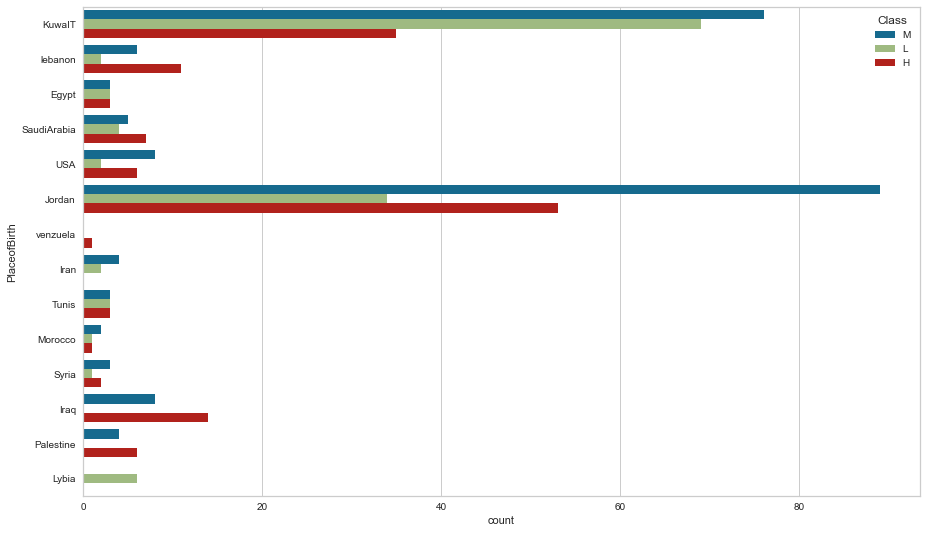

In [17]:
plt.figure(figsize=(15,9))
sns.countplot(y=categorical_F["PlaceofBirth"], hue="Class", data=data)

In [18]:
data.groupby(categorical_F["PlaceofBirth"])["Class"].value_counts()

PlaceofBirth  Class
Egypt         H         3
              L         3
              M         3
Iran          M         4
              L         2
Iraq          H        14
              M         8
Jordan        M        89
              H        53
              L        34
KuwaIT        M        76
              L        69
              H        35
Lybia         L         6
Morocco       M         2
              H         1
              L         1
Palestine     H         6
              M         4
SaudiArabia   H         7
              M         5
              L         4
Syria         M         3
              H         2
              L         1
Tunis         H         3
              L         3
              M         3
USA           M         8
              H         6
              L         2
lebanon       H        11
              M         6
              L         2
venzuela      H         1
Name: Class, dtype: int64

In [19]:
categorical_F["PlaceofBirth"].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

#### 3.1.4 StageID Features

<AxesSubplot:xlabel='count', ylabel='StageID'>

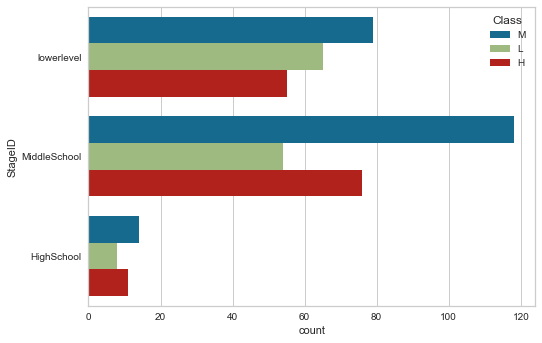

In [20]:
sns.countplot(y=categorical_F["StageID"], hue="Class", data=data)

In [21]:
data.groupby(categorical_F["StageID"])["Class"].value_counts()

StageID       Class
HighSchool    M         14
              H         11
              L          8
MiddleSchool  M        118
              H         76
              L         54
lowerlevel    M         79
              L         65
              H         55
Name: Class, dtype: int64

In [22]:
categorical_F["StageID"].value_counts()

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

#### 3.1.5 GradeID Features

<AxesSubplot:xlabel='count', ylabel='GradeID'>

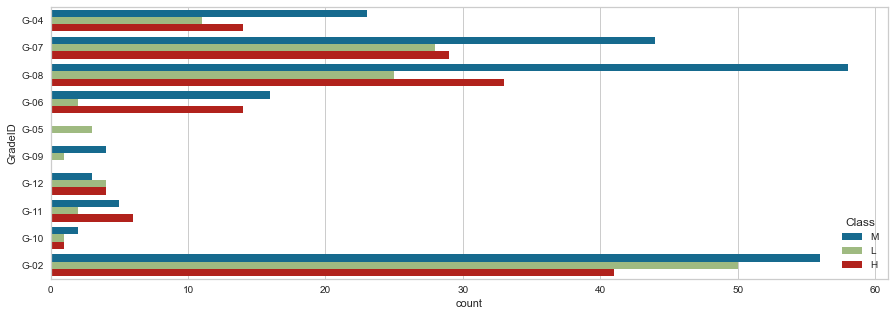

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(y=categorical_F["GradeID"], hue="Class", data=data)

In [24]:
data.groupby(categorical_F["GradeID"])["Class"].value_counts()

GradeID  Class
G-02     M        56
         L        50
         H        41
G-04     M        23
         H        14
         L        11
G-05     L         3
G-06     M        16
         H        14
         L         2
G-07     M        44
         H        29
         L        28
G-08     M        58
         H        33
         L        25
G-09     M         4
         L         1
G-10     M         2
         H         1
         L         1
G-11     H         6
         M         5
         L         2
G-12     H         4
         L         4
         M         3
Name: Class, dtype: int64

In [25]:
categorical_F["GradeID"].value_counts()


G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64

#### 3.1.6 SectionID Features

<AxesSubplot:xlabel='count', ylabel='SectionID'>

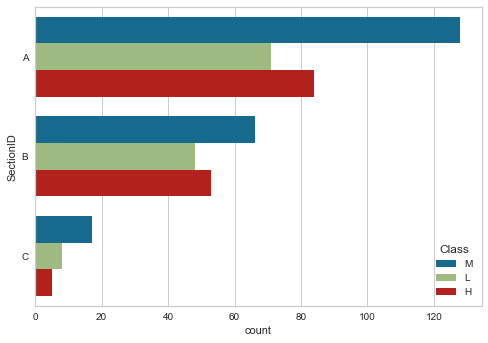

In [26]:
sns.countplot(y=categorical_F["SectionID"], hue="Class", data=data)

In [27]:
data.groupby(categorical_F["SectionID"])["Class"].value_counts()

SectionID  Class
A          M        128
           H         84
           L         71
B          M         66
           H         53
           L         48
C          M         17
           L          8
           H          5
Name: Class, dtype: int64

In [28]:
categorical_F["SectionID"].value_counts()

A    283
B    167
C     30
Name: SectionID, dtype: int64

#### 3.1.7 Topic Features

<AxesSubplot:xlabel='count', ylabel='Topic'>

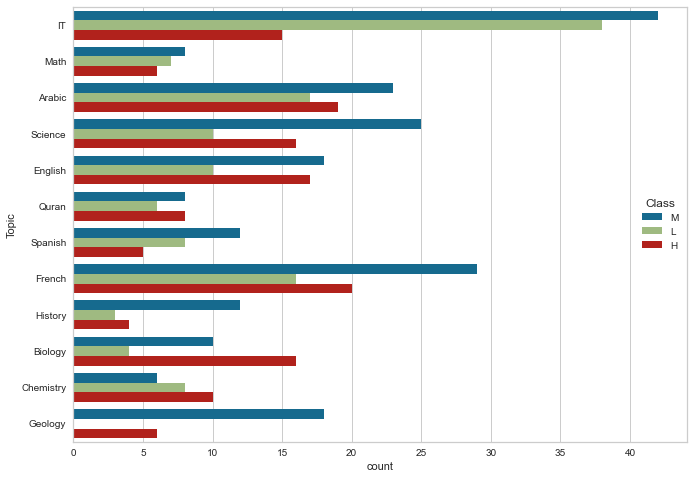

In [29]:
plt.figure(figsize=(11,8))
sns.countplot(y=categorical_F["Topic"], hue="Class", data=data)

In [30]:
data.groupby(categorical_F["Topic"])["Class"].value_counts()

Topic      Class
Arabic     M        23
           H        19
           L        17
Biology    H        16
           M        10
           L         4
Chemistry  H        10
           L         8
           M         6
English    M        18
           H        17
           L        10
French     M        29
           H        20
           L        16
Geology    M        18
           H         6
History    M        12
           H         4
           L         3
IT         M        42
           L        38
           H        15
Math       M         8
           L         7
           H         6
Quran      H         8
           M         8
           L         6
Science    M        25
           H        16
           L        10
Spanish    M        12
           L         8
           H         5
Name: Class, dtype: int64

In [31]:
categorical_F["Topic"].value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

#### 3.1.8 Semester Features

<AxesSubplot:xlabel='count', ylabel='Semester'>

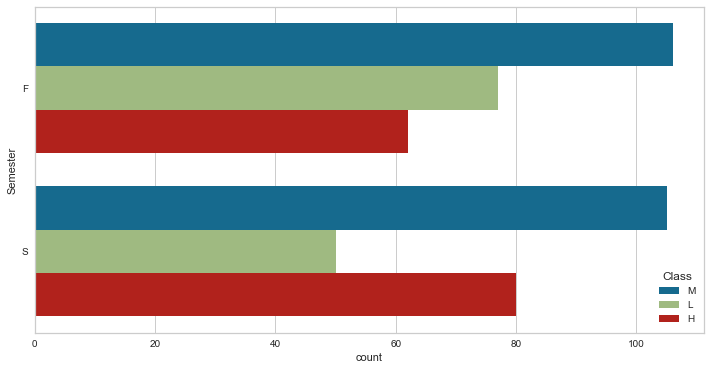

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(y=categorical_F["Semester"], hue="Class", data=data)

In [33]:
data.groupby(categorical_F["Semester"])["Class"].value_counts()


Semester  Class
F         M        106
          L         77
          H         62
S         M        105
          H         80
          L         50
Name: Class, dtype: int64

In [34]:
categorical_F["Semester"].value_counts()

F    245
S    235
Name: Semester, dtype: int64

#### 3.1.9 Relation Features

<AxesSubplot:xlabel='count', ylabel='Relation'>

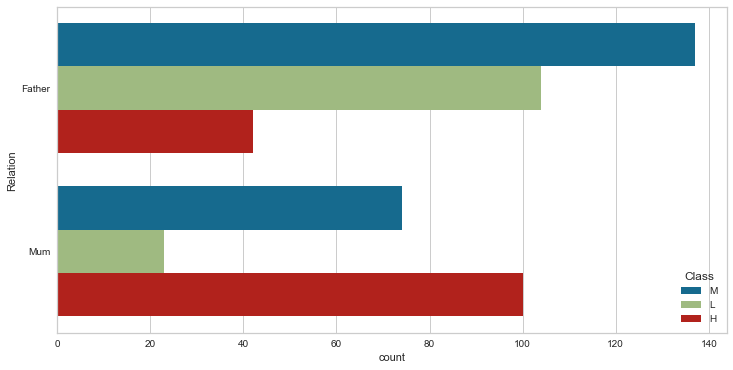

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(y=categorical_F["Relation"], hue="Class", data=data)

In [36]:
data.groupby(categorical_F["Relation"])["Class"].value_counts()

Relation  Class
Father    M        137
          L        104
          H         42
Mum       H        100
          M         74
          L         23
Name: Class, dtype: int64

In [37]:
categorical_F["Relation"].value_counts()

Father    283
Mum       197
Name: Relation, dtype: int64

#### 3.1.10 ParentAnsweringSurvey Features

<AxesSubplot:xlabel='count', ylabel='ParentAnsweringSurvey'>

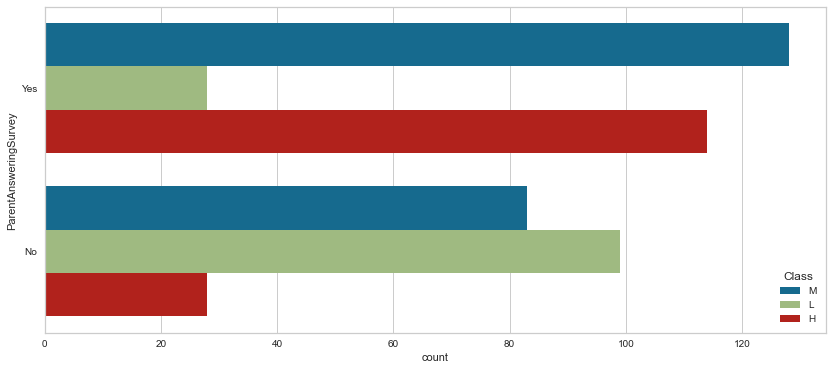

In [38]:
plt.figure(figsize=(14,6))
sns.countplot(y=categorical_F["ParentAnsweringSurvey"], hue="Class", data=data)

In [39]:
data.groupby(categorical_F["ParentAnsweringSurvey"])["Class"].value_counts()


ParentAnsweringSurvey  Class
No                     L         99
                       M         83
                       H         28
Yes                    M        128
                       H        114
                       L         28
Name: Class, dtype: int64

In [40]:
categorical_F["ParentAnsweringSurvey"].value_counts()

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64

#### 3.1.11 ParentschoolSatisfaction Features

<AxesSubplot:xlabel='count', ylabel='ParentschoolSatisfaction'>

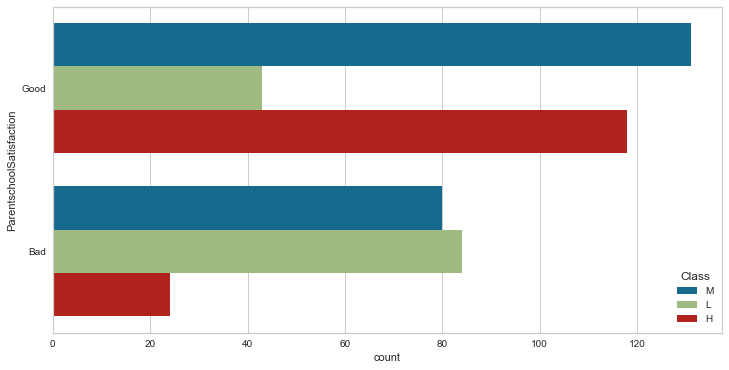

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(y=categorical_F["ParentschoolSatisfaction"], hue="Class", data=data)

In [42]:
data.groupby(categorical_F["ParentschoolSatisfaction"])["Class"].value_counts()

ParentschoolSatisfaction  Class
Bad                       L         84
                          M         80
                          H         24
Good                      M        131
                          H        118
                          L         43
Name: Class, dtype: int64

In [43]:
categorical_F["ParentschoolSatisfaction"].value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

#### 3.1.12 StudentAbsenceDays Features

<AxesSubplot:xlabel='count', ylabel='StudentAbsenceDays'>

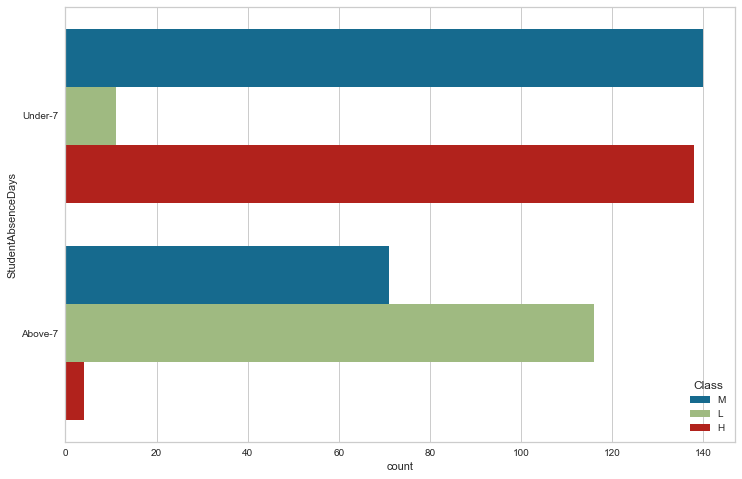

In [44]:
plt.figure(figsize=(12,8))
sns.countplot(y=categorical_F["StudentAbsenceDays"], hue="Class", data=data)

In [45]:
data.groupby(categorical_F["StudentAbsenceDays"])["Class"].value_counts()

StudentAbsenceDays  Class
Above-7             L        116
                    M         71
                    H          4
Under-7             M        140
                    H        138
                    L         11
Name: Class, dtype: int64

In [46]:
categorical_F["StudentAbsenceDays"].value_counts()

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64

### 3.2 Numeric Features

In [47]:
Numeric_F = data.select_dtypes(np.number)

In [48]:
Numeric_F.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [49]:
Numeric_F.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50


#### 3.2.1 raisedhands Features

<AxesSubplot:xlabel='raisedhands'>

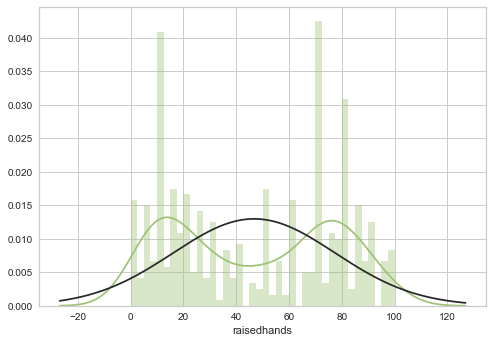

In [50]:
sns.distplot(data["raisedhands"],color="g",bins=40,fit=scipy.stats.norm)

#### 3.2.2 VisITedResources Features

<AxesSubplot:xlabel='VisITedResources'>

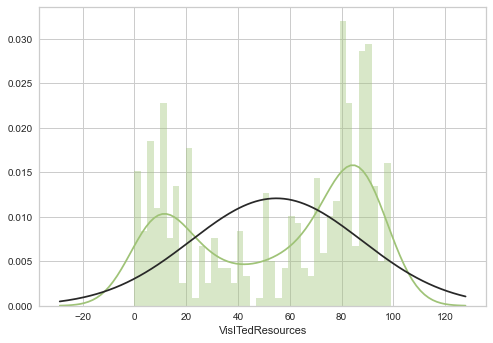

In [51]:
sns.distplot(data["VisITedResources"],color="g",bins=40,fit=scipy.stats.norm)

#### 3.2.3 AnnouncementsView Features

<AxesSubplot:xlabel='AnnouncementsView'>

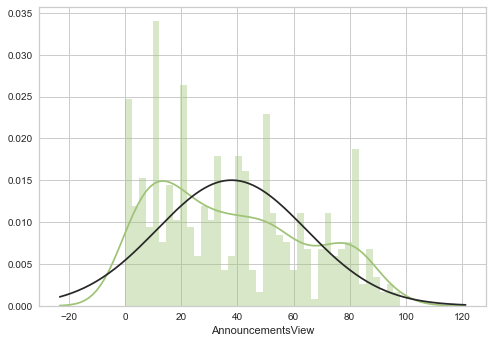

In [52]:
sns.distplot(data["AnnouncementsView"],color="g",bins=40,fit=scipy.stats.norm)

#### 3.2.3 Discussion Features

In [53]:
data["Discussion"].describe()

count    480.000000
mean      43.283333
std       27.637735
min        1.000000
25%       20.000000
50%       39.000000
75%       70.000000
max       99.000000
Name: Discussion, dtype: float64

<AxesSubplot:xlabel='Discussion'>

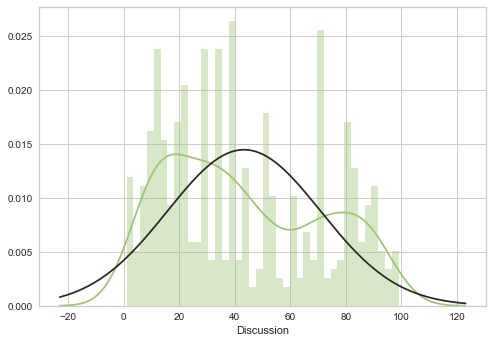

In [54]:
sns.distplot(data["Discussion"],color="g",bins=40,fit=scipy.stats.norm)

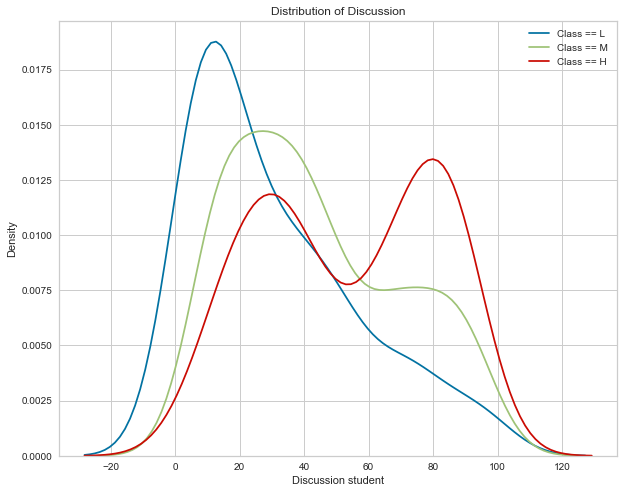

In [55]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(data.loc[data['Class'] == "L", 'Discussion'] ,label = 'Class == L')
sns.kdeplot(data.loc[data['Class'] == "M", 'Discussion'],label = 'Class == M')
sns.kdeplot(data.loc[data['Class'] == "H", 'Discussion'],label = 'Class == H')




# Labeling of plot
plt.xlabel('Discussion student'); plt.ylabel('Density'); plt.title('Distribution of Discussion');

## 4. Creation Feature 

In [56]:
categorical_F["Topic"].value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

 we can create new feature here called Tracks 

In [57]:
# create a list of our conditions
conditions = [
    (data["Topic"] == "IT"),
    ((data["Topic"] == "French") | (data["Topic"] == "Arabic") | (data["Topic"] == "English") | (data["Topic"] == "Spanish")),
    ((data["Topic"] == "Science") | (data["Topic"] == "Biology") | (data["Topic"] == "Chemistry") | (data["Topic"] == "Geology") |  (data["Topic"] == "Math")),
    (data["Topic"] == "Quran"),
    (data["Topic"] == "History")
    ]

# create a list of the values we want to assign for each condition
values = ["information technology", "languages", "Sciences", "religion" , "History"]

# create a new column and use np.select to assign values to it using our lists as arguments
data['Tracks'] = np.select(conditions, values)

# display updated DataFrame
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Tracks
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,information technology
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,information technology
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,information technology
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,information technology
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,information technology


In [58]:
data["Tracks"].value_counts()

languages                 194
Sciences                  150
information technology     95
religion                   22
History                    19
Name: Tracks, dtype: int64

In [59]:
categorical_F["Topic"].value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

In [60]:
data.head(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Tracks
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,information technology
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,information technology
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,information technology
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,information technology
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,information technology


In [61]:
data["GradeID"].value_counts()

G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64

<AxesSubplot:xlabel='GradeID', ylabel='count'>

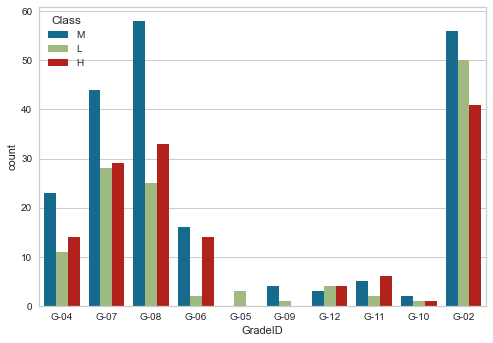

In [62]:
sns.countplot(x="GradeID",data=data,hue="Class")

In [63]:
data["StageID"].value_counts()

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

In [64]:
data.groupby(data["StageID"])["GradeID"].value_counts()

StageID       GradeID
HighSchool    G-11        13
              G-12        11
              G-09         5
              G-10         4
MiddleSchool  G-08       116
              G-07       100
              G-06        32
lowerlevel    G-02       147
              G-04        48
              G-05         3
              G-07         1
Name: GradeID, dtype: int64

In [65]:
data.groupby(data["NationalITy"])["PlaceofBirth"].value_counts()

NationalITy  PlaceofBirth
Egypt        Egypt             8
             KuwaIT            1
Iran         Iran              6
Iraq         Iraq             22
Jordan       Jordan          152
             SaudiArabia       9
             Palestine         4
             lebanon           3
             USA               2
             Egypt             1
             KuwaIT            1
KW           KuwaIT          177
             USA               2
Lybia        Lybia             6
Morocco      Morocco           4
Palestine    Jordan           22
             Palestine         6
SaudiArabia  SaudiArabia       6
             USA               5
Syria        Syria             6
             Jordan            1
Tunis        Tunis             9
             KuwaIT            1
             SaudiArabia       1
             USA               1
USA          USA               6
lebanon      lebanon          16
             Jordan            1
venzuela     venzuela          1
Name: PlaceofBirt

In [66]:
def PlaceofBirth(row):
    
    
    
    if ((row["NationalITy"] == "Egypt")  & (row["PlaceofBirth"] == "Egypt")) | ((row["NationalITy"] == "venzuela") & (row["PlaceofBirth"] == "venzuela")) |((row["NationalITy"] == "lebanon" )& (row["PlaceofBirth"] == "lebanon")) |((row["NationalITy"] == "USA") & (row["PlaceofBirth"] == "USA"))|((row["NationalITy"] == "Tunis")  & (row["PlaceofBirth"] == "Tunis"))|((row["NationalITy"] == "Syria") & (row["PlaceofBirth"] == "Syria"))|((row["NationalITy"]== "SaudiArabia")  & (row["PlaceofBirth"] == "SaudiArabia"))|((row["NationalITy"]== "Palestine")  & (row["PlaceofBirth"] == "Palestine"))|((row["NationalITy"] == "Morocco") & (row["PlaceofBirth"] == "Morocco"))|((row["NationalITy"] == "Lybia") & (row["PlaceofBirth"] == "Lybia"))|((row["NationalITy"] == "Jordan") & (row["PlaceofBirth"] == "Jordan"))|((row["NationalITy"]== "Iraq") & (row["PlaceofBirth"] == "Iraq"))|((row["NationalITy"] == "KW") & (row["PlaceofBirth"] =="KuwaIT"))|((row["NationalITy"]== "Iran") & (row["PlaceofBirth"] == "Iran")):
            return 1
    else:
        return 0 
    

In [67]:
data["BrithInHisCountery"] = data.apply(PlaceofBirth, axis=1)

In [68]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Tracks,BrithInHisCountery
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,information technology,1
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,information technology,1
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,information technology,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,information technology,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,information technology,1


In [69]:
data.groupby(data["PlaceofBirth"])["NationalITy"].value_counts()

PlaceofBirth  NationalITy
Egypt         Egypt            8
              Jordan           1
Iran          Iran             6
Iraq          Iraq            22
Jordan        Jordan         152
              Palestine       22
              Syria            1
              lebanon          1
KuwaIT        KW             177
              Egypt            1
              Jordan           1
              Tunis            1
Lybia         Lybia            6
Morocco       Morocco          4
Palestine     Palestine        6
              Jordan           4
SaudiArabia   Jordan           9
              SaudiArabia      6
              Tunis            1
Syria         Syria            6
Tunis         Tunis            9
USA           USA              6
              SaudiArabia      5
              Jordan           2
              KW               2
              Tunis            1
lebanon       lebanon         16
              Jordan           3
venzuela      venzuela         1
Name: NationalITy

In [70]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Tracks,BrithInHisCountery
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,information technology,1
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,information technology,1
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,information technology,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,information technology,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,information technology,1


In [71]:
data["ParentInteractionWithSchool"] = data["Relation"] +"-"+ data["ParentschoolSatisfaction"]

In [72]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Tracks,BrithInHisCountery,ParentInteractionWithSchool
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,information technology,1,Father-Good
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,information technology,1,Father-Good
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,information technology,1,Father-Bad
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,information technology,1,Father-Bad
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,information technology,1,Father-Bad


In [73]:
data["StageID"].value_counts()

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

In [74]:
data[data["StageID"] == "lowerlevel"].mean()

raisedhands           38.447236
VisITedResources      50.798995
AnnouncementsView     31.417085
Discussion            38.427136
BrithInHisCountery     0.914573
dtype: float64

In [75]:
meanOfLower = 38.447236 + 50.798995 + 31.417085 + 38.427136

In [76]:
meanOfLower

159.090452

In [77]:
data[data["StageID"] == "MiddleSchool"].mean()

raisedhands           53.939516
VisITedResources      58.568548
AnnouncementsView     43.274194
Discussion            45.875000
BrithInHisCountery     0.879032
dtype: float64

In [78]:
meanOfMiddle = 53.939516 + 58.568548 + 43.274194 + 45.875000

In [79]:
meanOfMiddle

201.65725799999998

In [80]:
data[data["StageID"] == "HighSchool"].mean()

raisedhands           43.151515
VisITedResources      50.575758
AnnouncementsView     36.878788
Discussion            53.090909
BrithInHisCountery     0.757576
dtype: float64

In [81]:
meanOfHigh = 43.151515 + 50.575758 + 36.878788 + 53.090909

In [82]:
meanOfHigh

183.69697000000002

In [83]:
def loveTopic(row):
    if row["StageID"] == "lowerlevel":
        if (row["raisedhands"] + row["VisITedResources"] + row["AnnouncementsView"] + row["Discussion"]) > 159.090452 :
            return 1
        else:
            return 0
    if row["StageID"] == "MiddleSchool":
        if (row["raisedhands"] + row["VisITedResources"] + row["AnnouncementsView"] + row["Discussion"]) > 201.65725799999998 :
            return 1
        else:
            return 0
    if row["StageID"] == "HighSchool":
        if (row["raisedhands"] + row["VisITedResources"] + row["AnnouncementsView"] + row["Discussion"]) > 183.69697000000002 :
            return 1
        else:
            return 0
    


In [84]:
data["loveTopic"] = data.apply(loveTopic,axis=1)

In [85]:
data["loveTopic"].value_counts()

1    250
0    230
Name: loveTopic, dtype: int64

In [86]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Tracks,BrithInHisCountery,ParentInteractionWithSchool,loveTopic
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,information technology,1,Father-Good,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,information technology,1,Father-Good,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,information technology,1,Father-Bad,0
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,information technology,1,Father-Bad,0
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,information technology,1,Father-Bad,0


In [87]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,BrithInHisCountery,loveTopic
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333,0.885417,0.520833
std,30.779223,33.080007,26.611244,27.637735,0.318851,0.500087
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,15.750000,20.000000,14.000000,20.000000,1.000000,0.000000
50%,50.000000,65.000000,33.000000,39.000000,1.000000,1.000000
75%,75.000000,84.000000,58.000000,70.000000,1.000000,1.000000
max,100.000000,99.000000,98.000000,99.000000,1.000000,1.000000


In [88]:
bin_raisedhands = pd.cut(data["raisedhands"],bins=[-1,16,51,100],labels=["LowRaishand","middileRaishand", "HighRaishand"])
data["raisedhands_bins"] = bin_raisedhands
data["raisedhands_bins"] = data["raisedhands_bins"].astype(str)

bin_VisITedResources = pd.cut(data["VisITedResources"],bins=[-1,20,65,100],labels=["LowVisITedResources","middileVisITedResources", "HighVisITedResources"])
data["VisITedResources_bins"] = bin_VisITedResources
data["VisITedResources_bins"] = data["VisITedResources_bins"].astype(str)

bin_AnnouncementsView = pd.cut(data["AnnouncementsView"],bins=[-1,14,33,99],labels=["LowAnnouncementsView","middileAnnouncementsView", "HighAnnouncementsView"])
data["AnnouncementsView_bins"] = bin_AnnouncementsView
data["AnnouncementsView_bins"] = data["AnnouncementsView_bins"].astype(str)

bin_Discussion = pd.cut(data["Discussion"],bins=[0,20,39,100],labels=["LowDiscussion","middileDiscussion", "HighDiscussion"])
data["Discussion_bins"] = bin_Discussion
data["Discussion_bins"] = data["Discussion_bins"].astype(str)


In [89]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Tracks,BrithInHisCountery,ParentInteractionWithSchool,loveTopic,raisedhands_bins,VisITedResources_bins,AnnouncementsView_bins,Discussion_bins
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,information technology,1,Father-Good,0,LowRaishand,LowVisITedResources,LowAnnouncementsView,LowDiscussion
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,information technology,1,Father-Good,0,middileRaishand,LowVisITedResources,LowAnnouncementsView,middileDiscussion
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,information technology,1,Father-Bad,0,LowRaishand,LowVisITedResources,LowAnnouncementsView,middileDiscussion
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,information technology,1,Father-Bad,0,middileRaishand,middileVisITedResources,LowAnnouncementsView,middileDiscussion
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,information technology,1,Father-Bad,0,middileRaishand,middileVisITedResources,LowAnnouncementsView,HighDiscussion


In [90]:
data.isnull().sum()

gender                         0
NationalITy                    0
PlaceofBirth                   0
StageID                        0
GradeID                        0
SectionID                      0
Topic                          0
Semester                       0
Relation                       0
raisedhands                    0
VisITedResources               0
AnnouncementsView              0
Discussion                     0
ParentAnsweringSurvey          0
ParentschoolSatisfaction       0
StudentAbsenceDays             0
Class                          0
Tracks                         0
BrithInHisCountery             0
ParentInteractionWithSchool    0
loveTopic                      0
raisedhands_bins               0
VisITedResources_bins          0
AnnouncementsView_bins         0
Discussion_bins                0
dtype: int64

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       480 non-null    object
 1   NationalITy                  480 non-null    object
 2   PlaceofBirth                 480 non-null    object
 3   StageID                      480 non-null    object
 4   GradeID                      480 non-null    object
 5   SectionID                    480 non-null    object
 6   Topic                        480 non-null    object
 7   Semester                     480 non-null    object
 8   Relation                     480 non-null    object
 9   raisedhands                  480 non-null    int64 
 10  VisITedResources             480 non-null    int64 
 11  AnnouncementsView            480 non-null    int64 
 12  Discussion                   480 non-null    int64 
 13  ParentAnsweringSurvey        480 no

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       480 non-null    object
 1   NationalITy                  480 non-null    object
 2   PlaceofBirth                 480 non-null    object
 3   StageID                      480 non-null    object
 4   GradeID                      480 non-null    object
 5   SectionID                    480 non-null    object
 6   Topic                        480 non-null    object
 7   Semester                     480 non-null    object
 8   Relation                     480 non-null    object
 9   raisedhands                  480 non-null    int64 
 10  VisITedResources             480 non-null    int64 
 11  AnnouncementsView            480 non-null    int64 
 12  Discussion                   480 non-null    int64 
 13  ParentAnsweringSurvey        480 no

## 5. Feature Encoding

we will use Label Encoding for any categorical variables with only 2 categories and One-Hot Encoding for any categorical variables with more than 2 categories


In [93]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Tracks,BrithInHisCountery,ParentInteractionWithSchool,loveTopic,raisedhands_bins,VisITedResources_bins,AnnouncementsView_bins,Discussion_bins
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,information technology,1,Father-Good,0,LowRaishand,LowVisITedResources,LowAnnouncementsView,LowDiscussion
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,information technology,1,Father-Good,0,middileRaishand,LowVisITedResources,LowAnnouncementsView,middileDiscussion
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,information technology,1,Father-Bad,0,LowRaishand,LowVisITedResources,LowAnnouncementsView,middileDiscussion
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,information technology,1,Father-Bad,0,middileRaishand,middileVisITedResources,LowAnnouncementsView,middileDiscussion
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,information technology,1,Father-Bad,0,middileRaishand,middileVisITedResources,LowAnnouncementsView,HighDiscussion


### 5.1 Lable Encoding 

In [94]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data[col].unique())) <= 2:
            # Train on the training data
            le.fit(data[col])
            # Transform both training and testing data
            data[col] = le.transform(data[col])
            
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)


6 columns were label encoded.


### 5.2 One-Hot Encoding

In [95]:
Y = data["Class"]

In [96]:
data = pd.get_dummies(data,drop_first=True)
print('Training Features shape: ', data.shape)


Training Features shape:  (480, 79)


# 6. Scaling the data

In [97]:
scaler = StandardScaler()
scaler.fit(data)

data = pd.DataFrame(scaler.transform(data), index=data.index, columns=data.columns)

In [98]:
data.head()

,gender,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,BrithInHisCountery,loveTopic,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,NationalITy_SaudiArabia,NationalITy_Syria,NationalITy_Tunis,NationalITy_USA,NationalITy_lebanon,NationalITy_venzuela,PlaceofBirth_Iran,PlaceofBirth_Iraq,PlaceofBirth_Jordan,PlaceofBirth_KuwaIT,PlaceofBirth_Lybia,PlaceofBirth_Morocco,PlaceofBirth_Palestine,PlaceofBirth_SaudiArabia,PlaceofBirth_Syria,PlaceofBirth_Tunis,PlaceofBirth_USA,PlaceofBirth_lebanon,PlaceofBirth_venzuela,StageID_MiddleSchool,StageID_lowerlevel,GradeID_G-04,GradeID_G-05,GradeID_G-06,GradeID_G-07,GradeID_G-08,GradeID_G-09,GradeID_G-10,GradeID_G-11,GradeID_G-12,SectionID_B,SectionID_C,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Class_L,Class_M,Tracks_Sciences,Tracks_information technology,Tracks_languages,Tracks_religion,ParentInteractionWithSchool_Father-Good,ParentInteractionWithSchool_Mum-Bad,ParentInteractionWithSchool_Mum-Good,raisedhands_bins_LowRaishand,raisedhands_bins_middileRaishand,VisITedResources_bins_LowVisITedResources,VisITedResources_bins_middileVisITedResources,AnnouncementsView_bins_LowAnnouncementsView,AnnouncementsView_bins_middileAnnouncementsView,Discussion_bins_LowDiscussion,Discussion_bins_middileDiscussion
0,0.757476,-0.979379,-0.834334,-1.033429,-1.174075,-1.351167,-0.843326,0.881917,0.802394,0.812957,0.359738,-1.042572,-0.112509,-0.219169,-0.747289,1.296751,-0.112509,-0.09167,-0.248891,-0.153148,-0.121652,-0.160128,-0.112509,-0.191617,-0.045691,-0.112509,-0.219169,-0.760886,1.290994,-0.112509,-0.09167,-0.145865,-0.185695,-0.112509,-0.138233,-0.185695,-0.203014,-0.045691,-1.033908,1.188301,3.0,-0.079305,-0.267261,-0.516227,-0.564519,-0.102598,-0.09167,-0.166845,-0.153148,-0.730443,-0.258199,-0.258199,-0.229416,-0.321634,-0.395761,-0.229416,-0.203014,2.013115,-0.213896,-0.219169,-0.344791,-0.234404,-0.599811,1.129107,-0.6742,2.013115,-0.823603,-0.219169,1.566281,-0.317675,-0.684025,1.713017,-0.625543,1.658312,-0.558100,1.722481,-0.586973,1.649524,-0.551677
1,0.757476,-0.979379,-0.834334,-0.870813,-1.053029,-1.313549,-0.662225,0.881917,0.802394,0.812957,0.359738,-1.042572,-0.112509,-0.219169,-0.747289,1.296751,-0.112509,-0.09167,-0.248891,-0.153148,-0.121652,-0.160128,-0.112509,-0.191617,-0.045691,-0.112509,-0.219169,-0.760886,1.290994,-0.112509,-0.09167,-0.145865,-0.185695,-0.112509,-0.138233,-0.185695,-0.203014,-0.045691,-1.033908,1.188301,3.0,-0.079305,-0.267261,-0.516227,-0.564519,-0.102598,-0.09167,-0.166845,-0.153148,-0.730443,-0.258199,-0.258199,-0.229416,-0.321634,-0.395761,-0.229416,-0.203014,2.013115,-0.213896,-0.219169,-0.344791,-0.234404,-0.599811,1.129107,-0.6742,2.013115,-0.823603,-0.219169,1.566281,-0.317675,-0.684025,-0.583765,1.598611,1.658312,-0.558100,1.722481,-0.586973,-0.606235,1.812654
2,0.757476,-0.979379,-0.834334,-1.196046,-1.446426,-1.426401,-0.481125,-1.133893,-1.246271,-1.230077,0.359738,-1.042572,-0.112509,-0.219169,-0.747289,1.296751,-0.112509,-0.09167,-0.248891,-0.153148,-0.121652,-0.160128,-0.112509,-0.191617,-0.045691,-0.112509,-0.219169,-0.760886,1.290994,-0.112509,-0.09167,-0.145865,-0.185695,-0.112509,-0.138233,-0.185695,-0.203014,-0.045691,-1.033908,1.188301,3.0,-0.079305,-0.267261,-0.516227,-0.564519,-0.102598,-0.09167,-0.166845,-0.153148,-0.730443,-0.258199,-0.258199,-0.229416,-0.321634,-0.395761,-0.229416,-0.203014,2.013115,-0.213896,-0.219169,-0.344791,-0.234404,1.667192,-0.885656,-0.6742,2.013115,-0.823603,-0.219169,-0.638455,-0.317675,-0.684025,1.713017,-0.625543,1.658312,-0.558100,1.722481,-0.586973,-0.606235,1.812654
3,0.757476,-0.979379,-0.834334,-0.545579,-0.901723,-1.238315,-0.300024,-1.133893,-1.246271,-1.230077,0.359738,-1.042572,-0.112509,-0.219169,-0.747289,1.296751,-0.112509,-0.091

In [99]:
data.describe()

,gender,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,BrithInHisCountery,loveTopic,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,NationalITy_SaudiArabia,NationalITy_Syria,NationalITy_Tunis,NationalITy_USA,NationalITy_lebanon,NationalITy_venzuela,PlaceofBirth_Iran,PlaceofBirth_Iraq,PlaceofBirth_Jordan,PlaceofBirth_KuwaIT,PlaceofBirth_Lybia,PlaceofBirth_Morocco,PlaceofBirth_Palestine,PlaceofBirth_SaudiArabia,PlaceofBirth_Syria,PlaceofBirth_Tunis,PlaceofBirth_USA,PlaceofBirth_lebanon,PlaceofBirth_venzuela,StageID_MiddleSchool,StageID_lowerlevel,GradeID_G-04,GradeID_G-05,GradeID_G-06,GradeID_G-07,GradeID_G-08,GradeID_G-09,GradeID_G-10,GradeID_G-11,GradeID_G-12,SectionID_B,SectionID_C,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Class_L,Class_M,Tracks_Sciences,Tracks_information technology,Tracks_languages,Tracks_religion,ParentInteractionWithSchool_Father-Good,ParentInteractionWithSchool_Mum-Bad,ParentInteractionWithSchool_Mum-Good,raisedhands_bins_LowRaishand,raisedhands_bins_middileRaishand,VisITedResources_bins_LowVisITedResources,VisITedResources_bins_middileVisITedResources,AnnouncementsView_bins_LowAnnouncementsView,AnnouncementsView_bins_middileAnnouncementsView,Discussion_bins_LowDiscussion,Discussion_bins_middileDiscussion
count,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02
mean,1.341519e-16,6.476301e-17,8.507084e-16,9.008997e-17,-1.614449e-16,-1.431725e-16,6.707597e-17,-1.378527e-16,5.782412e-16,-4.163336e-17,-6.103914e-16,7.475502e-16,2.166670e-16,-6.706441e-16,-5.708397e-16,1.495100e-15,9.824317e-17,-2.408374e-16,-6.123574e-16,-4.014150e-16,2.552935e-16,1.444446e-16,3.350908e-16,2.853042e-16,3.078267e-16,2.166670e-16,-6.706441e-16,-2.803313e-16,-1.456243e-15,9.824317e-17,-2.408374e-16,-3.028827e-16,1.252470e-16,-9.078386e-18,-3.965578e-16,-9.302744e-16,-5.995204e-16,3.078267e-16,1.021405e-15,-1.822616e-16,-4.792463e-16,4.905220e-16,6.827872e-16,-1.350771e-16,-2.507254e-16,-7.823603e-17,2.254562e-16,-7.867549e-16,-6.382626e-16,8.095376e-17,-1.563564e-16,-9.224103e-16,-9.621933e-16,-2.946717e-16,-7.579585e-16,-9.168592e-16,-6.809368e-16,1.407902e-15,-8.357898e-16,-3.715778e-16,-2.916648e-16,1.142605e-16,3.182639e-16,1.924387e-16,1.236973e-15,1.407902e-15,6.305142e-16,-3.715778e-16,-4.921989e-16,3.598973e-16,8.784640e-16,3.830269e-16,-4.699944e-16,-2.646032e-16,-1.956768e-16,4.050001e-16,1.017704e-17,-2.572017e-16,-5.028385e-16
std,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+0

In [100]:
data.columns

Index(['gender', 'Semester', 'Relation', 'raisedhands', 'VisITedResources',
       'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'BrithInHisCountery',
       'loveTopic', 'NationalITy_Iran', 'NationalITy_Iraq',
       'NationalITy_Jordan', 'NationalITy_KW', 'NationalITy_Lybia',
       'NationalITy_Morocco', 'NationalITy_Palestine',
       'NationalITy_SaudiArabia', 'NationalITy_Syria', 'NationalITy_Tunis',
       'NationalITy_USA', 'NationalITy_lebanon', 'NationalITy_venzuela',
       'PlaceofBirth_Iran', 'PlaceofBirth_Iraq', 'PlaceofBirth_Jordan',
       'PlaceofBirth_KuwaIT', 'PlaceofBirth_Lybia', 'PlaceofBirth_Morocco',
       'PlaceofBirth_Palestine', 'PlaceofBirth_SaudiArabia',
       'PlaceofBirth_Syria', 'PlaceofBirth_Tunis', 'PlaceofBirth_USA',
       'PlaceofBirth_lebanon', 'PlaceofBirth_venzuela', 'StageID_MiddleSchool',
       'StageID_lowerlevel', 'GradeID_G-04', 'GradeID_G-05', 'GradeID_G-06',
       'G

In [101]:

x= data.drop(["Class_L","Class_M"],axis=1)


## 7. Handle imbalanced datasets

In [102]:
Y.value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

In [103]:
from imblearn.combine import SMOTETomek

smk = SMOTETomek(random_state=42)
X_new , Y_new = smk.fit_resample(x,Y) 

In [104]:
Y_new.value_counts()

L    204
H    196
M    189
Name: Class, dtype: int64

In [105]:
X_new

,gender,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,BrithInHisCountery,loveTopic,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,NationalITy_SaudiArabia,NationalITy_Syria,NationalITy_Tunis,NationalITy_USA,NationalITy_lebanon,NationalITy_venzuela,PlaceofBirth_Iran,PlaceofBirth_Iraq,PlaceofBirth_Jordan,PlaceofBirth_KuwaIT,PlaceofBirth_Lybia,PlaceofBirth_Morocco,PlaceofBirth_Palestine,PlaceofBirth_SaudiArabia,PlaceofBirth_Syria,PlaceofBirth_Tunis,PlaceofBirth_USA,PlaceofBirth_lebanon,PlaceofBirth_venzuela,StageID_MiddleSchool,StageID_lowerlevel,GradeID_G-04,GradeID_G-05,GradeID_G-06,GradeID_G-07,GradeID_G-08,GradeID_G-09,GradeID_G-10,GradeID_G-11,GradeID_G-12,SectionID_B,SectionID_C,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Tracks_Sciences,Tracks_information technology,Tracks_languages,Tracks_religion,ParentInteractionWithSchool_Father-Good,ParentInteractionWithSchool_Mum-Bad,ParentInteractionWithSchool_Mum-Good,raisedhands_bins_LowRaishand,raisedhands_bins_middileRaishand,VisITedResources_bins_LowVisITedResources,VisITedResources_bins_middileVisITedResources,AnnouncementsView_bins_LowAnnouncementsView,AnnouncementsView_bins_middileAnnouncementsView,Discussion_bins_LowDiscussion,Discussion_bins_middileDiscussion
0,0.757476,-0.979379,-0.834334,-1.033429,-1.174075,-1.351167,-0.843326,0.881917,0.802394,0.812957,0.359738,-1.042572,-0.112509,-0.219169,-0.747289,1.296751,-0.112509,-0.09167,-0.248891,-0.153148,-0.121652,-0.160128,-0.112509,-0.191617,-0.045691,-0.112509,-0.219169,-0.760886,1.290994,-0.112509,-0.09167,-0.145865,-0.185695,-0.112509,-0.138233,-0.185695,-0.203014,-0.045691,-1.033908,1.188301,3.000000,-0.079305,-0.267261,-0.516227,-0.564519,-0.102598,-0.09167,-0.166845,-0.153148,-0.730443,-0.258199,-0.258199,-0.229416,-0.321634,-0.395761,-0.229416,-0.203014,2.013115,-0.213896,-0.219169,-0.344791,-0.234404,-0.67420,2.013115,-0.823603,-0.219169,1.566281,-0.317675,-0.684025,1.713017,-0.625543,1.658312,-0.558100,1.722481,-0.586973,1.649524,-0.551677
1,0.757476,-0.979379,-0.834334,-0.870813,-1.053029,-1.313549,-0.662225,0.881917,0.802394,0.812957,0.359738,-1.042572,-0.112509,-0.219169,-0.747289,1.296751,-0.112509,-0.09167,-0.248891,-0.153148,-0.121652,-0.160128,-0.112509,-0.191617,-0.045691,-0.112509,-0.219169,-0.760886,1.290994,-0.112509,-0.09167,-0.145865,-0.185695,-0.112509,-0.138233,-0.185695,-0.203014,-0.045691,-1.033908,1.188301,3.000000,-0.079305,-0.267261,-0.516227,-0.564519,-0.102598,-0.09167,-0.166845,-0.153148,-0.730443,-0.258199,-0.258199,-0.229416,-0.321634,-0.395761,-0.229416,-0.203014,2.013115,-0.213896,-0.219169,-0.344791,-0.234404,-0.67420,2.013115,-0.823603,-0.219169,1.566281,-0.317675,-0.684025,-0.583765,1.598611,1.658312,-0.558100,1.722481,-0.586973,-0.606235,1.812654
2,0.757476,-0.979379,-0.834334,-1.196046,-1.446426,-1.426401,-0.481125,-1.133893,-1.246271,-1.230077,0.359738,-1.042572,-0.112509,-0.219169,-0.747289,1.296751,-0.112509,-0.09167,-0.248891,-0.153148,-0.121652,-0.160128,-0.112509,-0.191617,-0.045691,-0.112509,-0.219169,-0.760886,1.290994,-0.112509,-0.09167,-0.145865,-0.185695,-0.112509,-0.138233,-0.185695,-0.203014,-0.045691,-1.033908,1.188301,3.000000,-0.079305,-0.267261,-0.516227,-0.564519,-0.102598,-0.09167,-0.166845,-0.153148,-0.730443,-0.258199,-0.258199,-0.229416,-0.321634,-0.395761,-0.229416,-0.203014,2.013115,-0.213896,-0.219169,-0.344791,-0.234404,-0.67420,2.013115,-0.823603,-0.219169,-0.638455,-0.317675,-0.684025,1.713017,-0.625543,1.658312,-0.558100,1.722481,-0.586973,-0.606235,1.812654
3,-1.320173,-0.979379,-0.834334,-0.155299,-0.750417,-0.937376,0.967682,0.881917,-1.246271,-1.230077,0.359738,-1.042572,-0.112509,-0.219169,-0.747289,1.296751,-0.112509,-0.09167,-0.248891,-0.153148,-0.121652,-0.160128,-0.112509,-0.

## 8. Split the data

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,Y_new,test_size=0.20,random_state=0)

## 9. Model Selection 

In [107]:
#setup(data=pd.concat([X_new , Y_new], axis=1), target="Class")


In [108]:
#compare_models()


In [109]:
ExTree = ExtraTreesClassifier(random_state=0)  
ExTree.fit(X_train, y_train)
Y_pred = ExTree.predict(X_test)
acc_ExTree = round(ExTree.score(X_train, y_train) * 100, 2)
print(classification_report(y_test,Y_pred))
print(f1_score(y_test,Y_pred,average="weighted"))
#acc_ExTree



              precision    recall  f1-score   support

           H       0.95      0.95      0.95        42
           L       0.86      1.00      0.93        38
           M       0.94      0.79      0.86        38

    accuracy                           0.92       118
   macro avg       0.92      0.91      0.91       118
weighted avg       0.92      0.92      0.91       118

0.9134825488690723


## 10. Hyperparameter Optimization

In [110]:
import optuna 

In [111]:
def ExTree_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 600)
    max_depth = trial.suggest_int('max_depth', 50, 1000)
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 50, 1000)
    criterion = trial.suggest_categorical('criterion', ["gini","entropy",])
    max_features = trial.suggest_categorical('max_features', ["sqrt", "log2", None])
    bootstrap = trial.suggest_categorical('bootstrap', [True,False])
    class_weight = trial.suggest_categorical('class_weight', ["balanced", "balanced_subsample"])
    warm_start = trial.suggest_categorical('warm_start', [True,False]),

    
    model = ExtraTreesClassifier(
        random_state=0,
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_leaf_nodes=max_leaf_nodes,
        criterion=criterion,
        max_features = max_features,
        bootstrap = bootstrap,
        warm_start= warm_start,
        class_weight=class_weight
        
    )
    
    model.fit(X_train, y_train)
    #Y_pred = model.predict(X_test)
    
    #f1_score(y_test,Y_pred,average="weighted")
    return model.score(X_test, y_test)



In [112]:
# study = optuna.create_study(direction='maximize')
# study.optimize(ExTree_objective, n_trials=100 )

In [113]:
#print(study.best_trial.value)

In [114]:
#study.best_params


In [115]:
ExTree = ExtraTreesClassifier(warm_start=False,class_weight="balanced_subsample",
                              max_features=None,bootstrap=False,n_estimators=197,
                              max_depth=553,criterion="entropy",max_leaf_nodes=340,
                              random_state=0)
ExTree.fit(X_train, y_train)
Y_pred = ExTree.predict(X_test)
acc_ExTree = round(ExTree.score(X_train, y_train) * 100, 2)
print(classification_report(y_test,Y_pred))
print(f1_score(y_test,Y_pred,average="weighted"))


              precision    recall  f1-score   support

           H       0.95      1.00      0.98        42
           L       0.88      1.00      0.94        38
           M       1.00      0.82      0.90        38

    accuracy                           0.94       118
   macro avg       0.95      0.94      0.94       118
weighted avg       0.95      0.94      0.94       118

0.9391737655749126
